### **Exercise : Simple Logistic Regression**

### Problem Statement

* You are provided with a dataset (`student_exam.csv`) containing student features such as study hours and previous exam scores.

* The goal is to build a logistic regression model to predict whether a student will pass or fail an exam.

* You need to explore and visualize the data, then prepare it for modeling.

* The split the dataset into training and testing sets.

* Train a logistic regression model and evaluate it on test data.

* Visualize the decision boundary to interpret the model behavior.

---

### 1. Introduction to the Problem

In this exercise, we'll use logistic regression to predict whether students will pass or fail their final exam based on:
- Number of hours spent studying
- Previous test scores

This is a binary classification problem where:
- Passed exam = 1
- Failed exam = 0

Logistic regression is well-suited for this task because:
- We're predicting a binary outcome (pass/fail)
- We want to calculate the probability of passing
- We want to understand the factors that influence exam success

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To suppress scientific notation
np.set_printoptions(suppress=True) 

### 3. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('student_exam.csv')
df.head()

,study_hours,previous_score,passed_exam
0,2.0,45,0
1,3.0,50,0
2,2.5,55,0
3,4.0,60,0
4,5.0,62,0


In [3]:
# Display the shape of the DataFrame
df.shape

(49, 3)

In [4]:
# Check the basic statistics of the DataFrame
df.describe()

,study_hours,previous_score,passed_exam
count,49.000000,49.000000,49.000000
mean,5.761224,67.897959,0.571429
std,2.471910,13.694958,0.500000
min,1.500000,40.000000,0.000000
25%,4.000000,60.000000,0.000000
50%,5.500000,67.000000,1.000000
75%,7.500000,77.000000,1.000000
max,11.000000,95.000000,1.000000


In [5]:
# Check class distribution
passed_count = df['passed_exam'].sum()
failed_count = len(df) - passed_count
print(f"Number of students who passed: {passed_count} ({passed_count/len(df)*100:.1f}%)")
print(f"Number of students who failed: {failed_count} ({failed_count/len(df)*100:.1f}%)")

Number of students who passed: 28 (57.1%)
Number of students who failed: 21 (42.9%)


### 4. Visualize the Data

Let's visualize the relationships between our features and exam results.

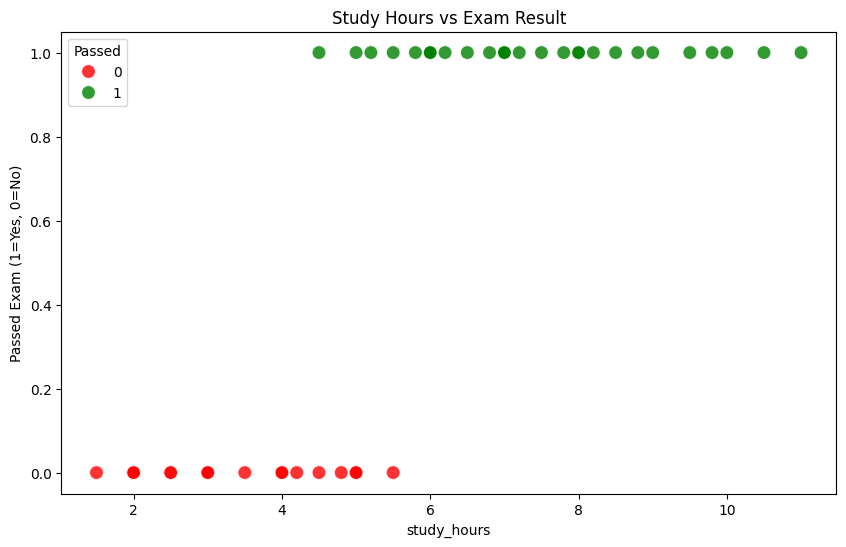

In [9]:
# Study hours vs exam result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='study_hours',
    y='passed_exam',
    hue='passed_exam',
    palette={0: 'red', 1: 'green'},
    s=100,
    alpha=0.8
)
plt.title('Study Hours vs Exam Result')
plt.ylabel('Passed Exam (1=Yes, 0=No)')
plt.legend(title='Passed')
plt.show()


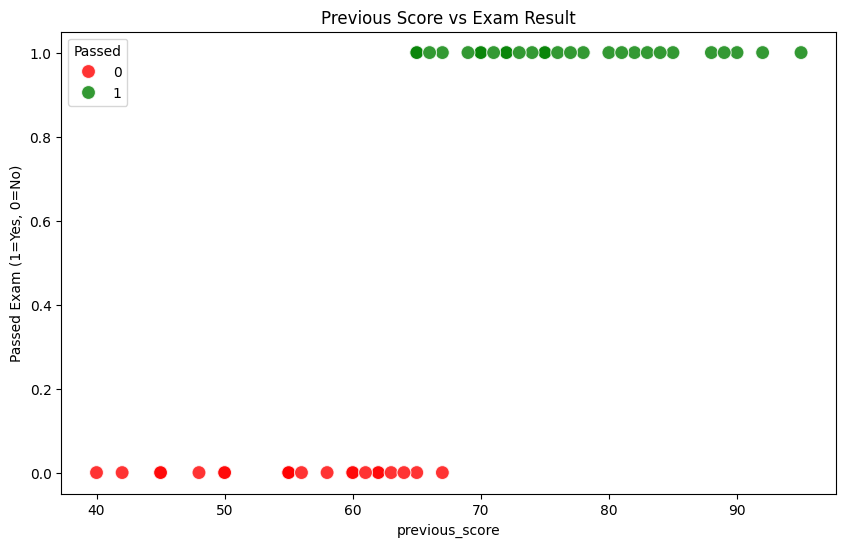

In [11]:
# Previous score vs exam result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='previous_score',
    y='passed_exam',
    hue='passed_exam',
    palette={0: 'red', 1: 'green'},
    s=100,
    alpha=0.8
)
plt.title('Previous Score vs Exam Result')
plt.ylabel('Passed Exam (1=Yes, 0=No)')
plt.legend(title='Passed')
plt.show()


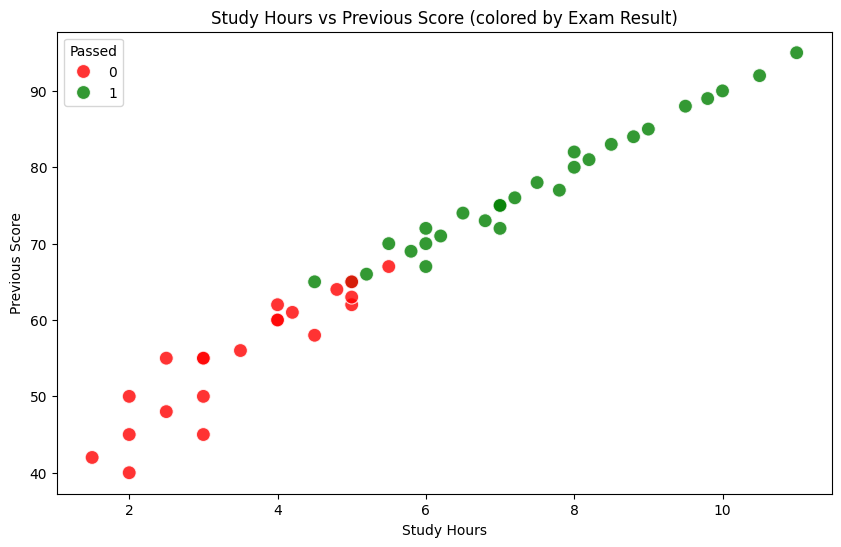

In [13]:
# Relationship between both features and the outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='study_hours',
    y='previous_score',
    hue='passed_exam',
    palette={0: 'red', 1: 'green'},
    s=100,
    alpha=0.8
)
plt.title('Study Hours vs Previous Score (colored by Exam Result)')
plt.xlabel('Study Hours')
plt.ylabel('Previous Score')
plt.legend(title='Passed')
plt.show()


#### Observations

From the visualizations, we can observe:

- Students who study more hours tend to pass the exam more often
- Students with higher previous scores are more likely to pass
- There appears to be a decision boundary where students above certain thresholds of study hours and previous scores are more likely to pass
- Some students with high previous scores passed even with fewer study hours

### 5. Split Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

X = df[['study_hours', 'previous_score']]
y = df['passed_exam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 39 samples
Testing set: 10 samples


### 6. Create and Train Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Examine model coefficients
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient for study_hours: {model.coef_[0][0]:.4f}")
print(f"Coefficient for previous_score: {model.coef_[0][1]:.4f}")

Intercept: -50.9503
Coefficient for study_hours: -0.1578
Coefficient for previous_score: 0.7924


#### Interpreting the Coefficients

The model coefficients tell us:

- **Intercept**: The base log-odds of passing when all features are zero
- **study_hours coefficient**: How much the log-odds of passing increase for each additional study hour
- **previous_score coefficient**: How much the log-odds of passing increase for each additional point in the previous score

Positive coefficients indicate that higher values of that feature increase the probability of passing the exam.

### 7. Evaluate Model Performance

In [17]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

Model accuracy: 1.00 (100.0%)


In [18]:
# Show prediction probabilities
proba = model.predict_proba(X_test)
proba_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Prob(Fail)': proba[:, 0],
    'Prob(Pass)': proba[:, 1]
})
proba_df.head(10)

,Actual,Predicted,Prob(Fail),Prob(Pass)
0,1,1,6.278007e-04,9.993722e-01
1,1,1,2.960344e-03,9.970397e-01
2,1,1,6.673511e-07,9.999993e-01
3,1,1,5.690411e-02,9.430959e-01
4,0,0,9.209088e-01,7.909122e-02
5,0,0,1.000000e+00,1.670399e-08
6,0,0,9.999983e-01,1.655834e-06
7,0,0,9.999999e-01,1.420360e-07
8,1,1,1.280553e-03,9.987194e-01
9,1,1,5.746851e-03,9.942531e-01


In [19]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0],
       [0, 6]])

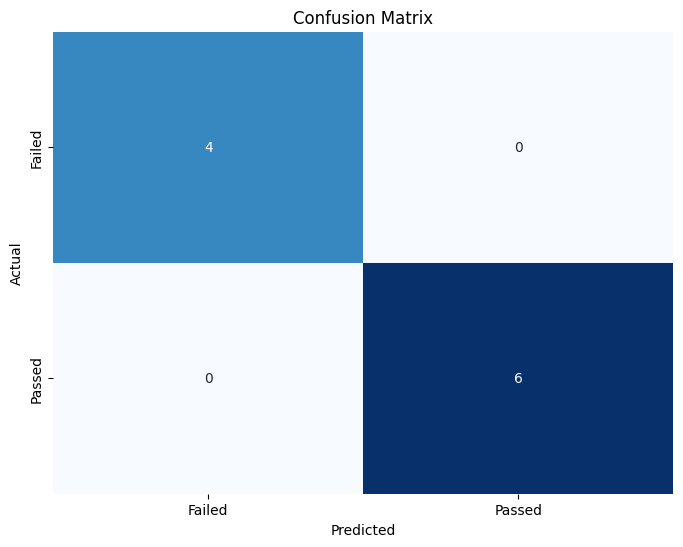

In [21]:
# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Failed', 'Passed'],
            yticklabels=['Failed', 'Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### 8. Visualize the Decision Boundary

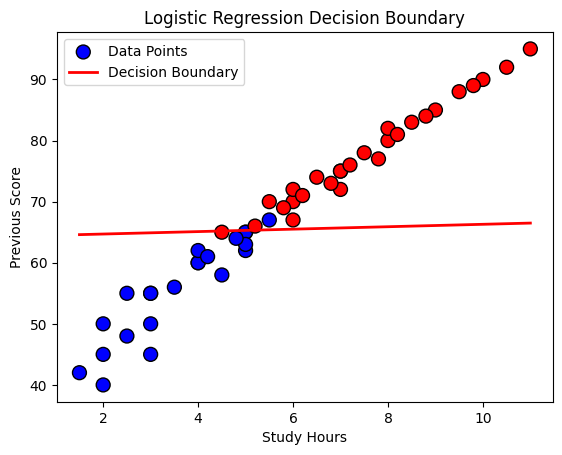

In [22]:
# Scatter plot of data points colored by class
plt.scatter(X['study_hours'], X['previous_score'], c=y, cmap='bwr', edgecolor='k', s=100, label='Data Points')

# Extract coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

# Create x values across the range
x_vals = np.array([X['study_hours'].min(), X['study_hours'].max()])

# Calculate corresponding y values for the decision boundary line
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

# Plot the decision boundary line
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Decision Boundary')

plt.xlabel('Study Hours')
plt.ylabel('Previous Score')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


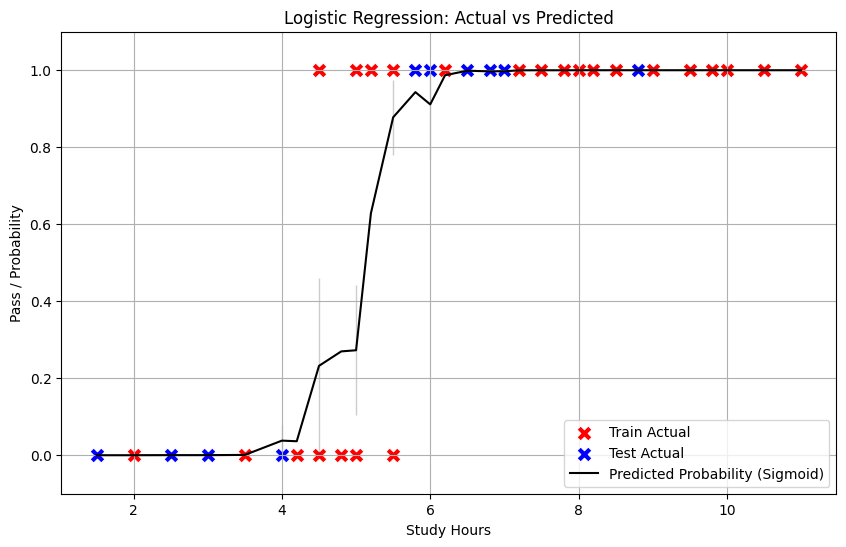

In [23]:
# Prepare train dataframe
df_train = X_train.copy()
df_train['actual_pass'] = y_train
df_train['predicted_proba'] = model.predict_proba(X_train)[:, 1]
df_train['set'] = 'train'

# Prepare test dataframe
df_test = X_test.copy()
df_test['actual_pass'] = y_test
df_test['predicted_proba'] = model.predict_proba(X_test)[:, 1]
df_test['set'] = 'test'

# Combine
df_all = pd.concat([df_train, df_test])

# Sort for line plotting
df_all_sorted = df_all.sort_values(by='study_hours')

# Plot actual labels and predicted probabilities
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_train, x='study_hours', y='actual_pass', color='red', marker='X', s=120, label='Train Actual')
sns.scatterplot(data=df_test, x='study_hours', y='actual_pass', color='blue', marker='X', s=120, label='Test Actual')
sns.lineplot(data=df_all_sorted, x='study_hours', y='predicted_proba', color='black', label='Predicted Probability (Sigmoid)')

plt.xlabel('Study Hours')
plt.ylabel('Pass / Probability')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()


### 9. Make Predictions for New Students

In [24]:
# Create data for new students
new_students = pd.DataFrame({
    'study_hours': [3, 5, 7, 9],
    'previous_score': [55, 65, 75, 85]
})
print("New student data:")
new_students

New student data:


,study_hours,previous_score
0,3,55
1,5,65
2,7,75
3,9,85


In [25]:
# Make predictions
predictions = model.predict(new_students)
probabilities = model.predict_proba(new_students)

# Display results
results = new_students.copy()
results['predicted_pass'] = predictions
results['pass_probability'] = probabilities[:, 1]  # Probability of passing
results

,study_hours,previous_score,predicted_pass,pass_probability
0,3,55,0,0.000392
1,5,65,0,0.441411
2,7,75,1,0.999372
3,9,85,1,1.000000


### 10. Summary

In this exercise, we built a logistic regression model to predict student exam outcomes based on study hours and previous test scores. 

**Key findings:**

- Both study hours and previous test scores are positively correlated with exam success
- The model achieved good accuracy in distinguishing between passing and failing students
- We visualized the decision boundary that separates passing and failing students
- We found an optimal probability threshold that maximizes the F1-score for our model
- We made predictions for new students to identify those who might need additional support

---
